In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
iris = pd.read_csv("/content/drive/My Drive/baitap/robotic/bai_thuc_hanh_3/Iris.csv") 
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

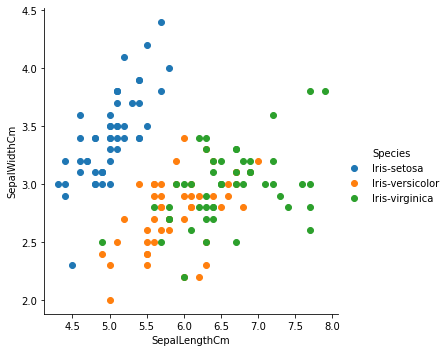

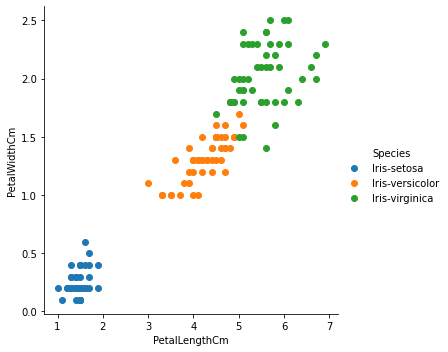

In [25]:
# #Một FacetGrid có thể được vẽ với tối đa ba chiều: col, row, và hue. 
# Hai chiều đầu tiên có sự tương ứng rõ ràng với mảng kết quả của các trục; 
# tuy nhiên biến hue như là một chiều thứ ba dọc theo một trục chiều sâu (Z), 
# trong đó các level/classes  khác nhau của biến được vẽ với màu sắc khác nhau

sns.FacetGrid(iris, hue="Species", size=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()
sns.FacetGrid(iris, hue="Species", size=5).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()

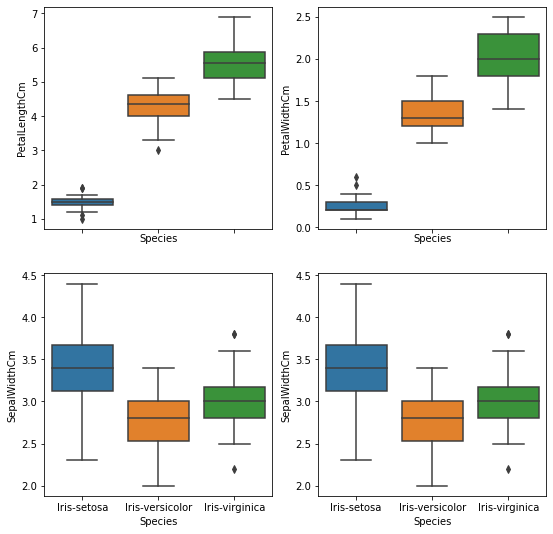

In [23]:
#  IQR cho biết sự phân tán dữ liệu quanh giá trị trung tâm; 
#  nó cũng có thể được sử dụng để nói khi một số các giá trị khác là "quá xa" từ giá trị trung tâm. 
#  Những điểm "quá xa xôi" này được gọi là "outliers"
f, axes = plt.subplots(2, 2, figsize=(9, 9), sharex=True)
sns.boxplot(x="Species", y="PetalLengthCm", data=iris, ax=axes[0, 0])
sns.boxplot(x="Species", y="PetalWidthCm", data=iris, ax=axes[0, 1])
sns.boxplot(x="Species", y="SepalWidthCm", data=iris, ax=axes[1, 0])
sns.boxplot(x="Species", y="SepalWidthCm", data=iris, ax=axes[1, 1])

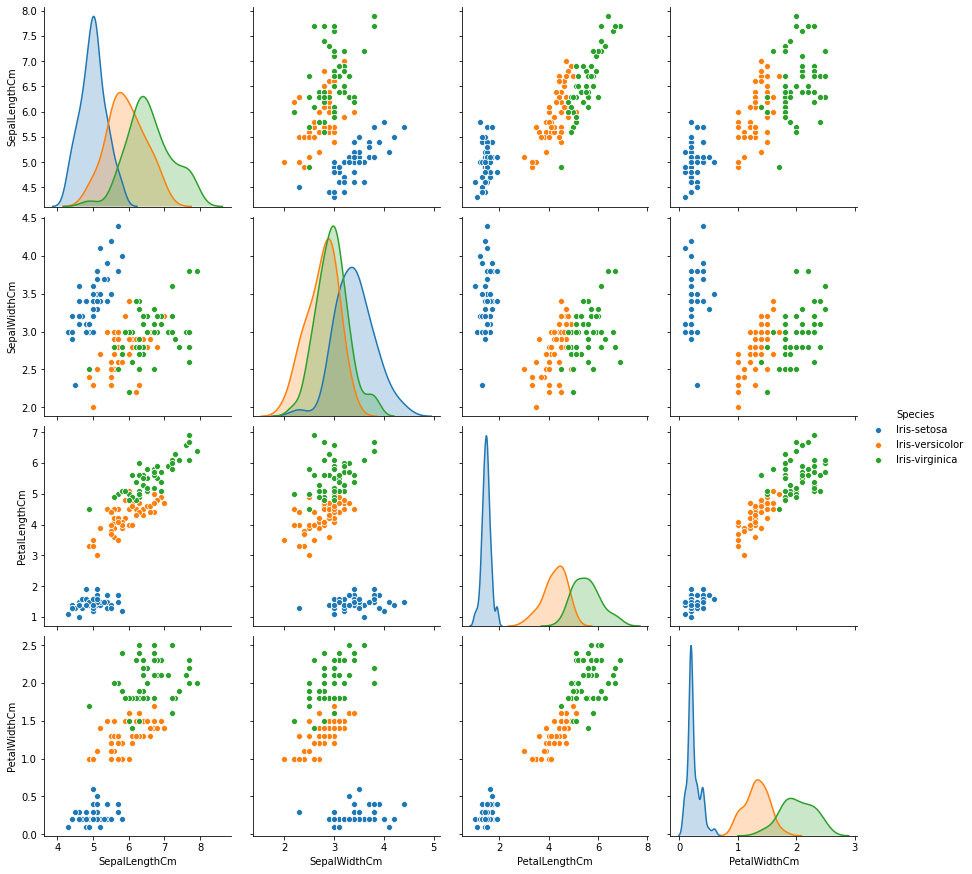

In [26]:
#Sử dụng PairGrid có thể cung cấp cho bạn bản tóm tắt ngắn gọn mà nhanh chóng về các mối quan hệ thú vị trong tập dữ liệu của bạn.
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

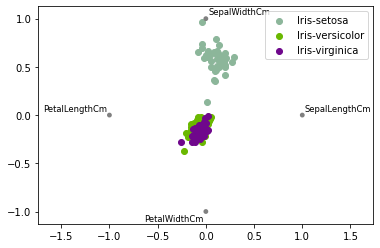

In [30]:
import pandas as pd
pd.plotting.radviz(iris.drop("Id", axis=1), "Species")

In [0]:
from sklearn.model_selection import train_test_split , KFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [0]:
array = iris.values
X = array[:,1:5]
Y = array[:,5]
validation_size = 0.20
seed = 7
scoring = 'accuracy'
num_folds = 10
num_instances = len(X_train)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [53]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

# evaluate each model 
results = []
names = []
for name, model in models:
	kfold = KFold(num_folds, shuffle=False, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ERROR! Session/line number was not unique in database. History logging moved to new session 59
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)


In [58]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

